In [1]:
using ColorBitstring, SetRounding
using LinearAlgebra, Plots, Test

## Lab 1

Number of bytes used to store number

In [2]:
sizeof(UInt32)

4

Type of a number

In [ ]:
typeof(5)

Unsigned and Hex notation

In [10]:
#Unsigned 8-bit integer - can't parse negatives or above 2^8 - 1
UInt8(5)

#Also denoted by 0b...
0b101

#Hexadecimal (interpreted as UInt38)
0xabcde

0x000abcde

Create a (number of type) from a specified sequence of bits

In [26]:
reinterpret(Int8, 0b11111111)

-1

Print the Sign, Exponent and Mantissa (nicely)

In [27]:
printbits(Float16(0.2))

0011001001100110

Converts number to a string of bits

In [28]:
bitstring(-11)

"1111111111111111111111111111111111111111111111111111111111110101"

Converts a string of bits to number. \
Note that negatives are represented using a - sign

In [29]:
parse(Int8, "-00001011"; base=2)

-11

reinterpret(parse(...)) takes in a *signed* bitstring and returns the number

In [32]:
function tenthbitto1(x::Int32)
    if x >= 0
        x = bitstring(x)[1:9] * "1" * bitstring(x)[11:end]
        return parse(Int32, x; base=2)
    else
        x = bitstring(x)[1:9] * "1" * bitstring(x)[11:end]
        return reinterpret(Int32, parse(UInt32, x; base=2))
    end
end

tenthbitto1(-Int32(100000010))

-95805706

Types

In [35]:
#Initialise
struct Rat
    p::Int
    q::Int
end

#Overloading
import Base: +, -, *, /, ==

#Operation
function ==(x::Rat, y::Rat)
    return x.p/x.q == y.p/y.q
end

== (generic function with 175 methods)

We can template (i.e. pass T) to allow fields to take different type

In [36]:
struct Foo{T}
    x::T
end

## Lab 2

Return the identity of the type; may be overloaded

In [40]:
one(Int), one(Int64), one(String)

#Can also call instance of type
one(2), one(2.0), one("any string")

(1, 1.0, "")

We may also overload in()

In [41]:
struct Interval{T}
    a::T
    b::T
end

import Base: one, in

one(A::Interval) = Interval(one(A.a), one(A.b))
in(x, A::Interval) = A.a ≤ x ≤ A.b

in (generic function with 37 methods)

Change the rounding mode of floating point operations corresponding to the type

In [44]:
setrounding(Float64, RoundDown) do
1.5 + 1/3
end

1.8333333333333333

If syntax:
```julia
if COND1
  # Do this if COND1 == true
elseif COND2
  # Do this if COND1 == false and COND2 == true
elseif COND3
  # Do this if COND1 == COND2 == false and COND3 == true
else
  # Do this if COND1 == COND2 == COND3 == false
end
```

&& denotes AND, and || denotes OR
(shift fn L for |)

In [45]:
true && true || false

true

`big` will create a `BigFloat` version of a `Float64` and the type
`BigFloat` allows changing the number of signficand bits.

`setprecision` uses the number of significand bits specified for any `BigFloat` within 

In [52]:
#_ is like a comma, not parsed
setprecision(1_00) do
    exp(big(1.0))
end

2.7182818284590452353602874713512

## Lab 3

COND ? X : Y is equivalent to writing: 

if COND \
X \
else \
Y \
end

In [56]:
#if x is 0, set nanabs = NaN, else nanabs = abs(x)
nanabs = x -> iszero(x) ? NaN : abs(x)
nanabs(0), nanabs(1)

(NaN, 1)

Plot syntax:

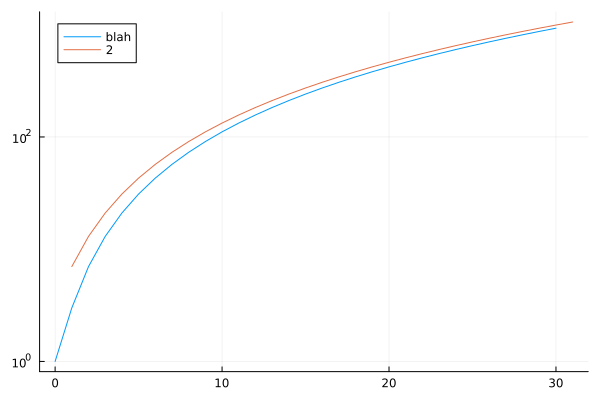

In [63]:
#Function notation
f = x -> 1 + x + x^2 

#Range notation; start:step:end
h = (0:1:30)

#f. for broadcasting to vector
y = f.(0:1:30)

#Plot syntax for multiple lines
plot(h,y, yaxis=:log10, label="blah")
plot!(f.(h .+ 2), yaxis=:log10, label="2")

Forward difference, Central Difference, Second order Forward Difference

In [67]:
fd(f,h,x) = (f(x + h) - f(x)) / h
cd(f,h,x) = (f(x + h) - f(x - h)) / (2 * h)
sofd(f,h,x) = (f(x + h) - 2 * f(x) + f(x - h))/ (h^2)

#Step size of root epsilon used for fd/cd, and cube root epsilon for sofd
f1 = x -> exp(exp(x)*cos(x) + sin(x))
println(fd(f1, sqrt(eps()), 0.1))
println(cd(f1, sqrt(eps()), 0.1))
println(sofd(f1, cbrt(eps()), 0.1))

6.584772557020187
6.584772542119026
12.002673711904597


Raise an error

In [70]:
if 1 + 1 == 2
    error("You suck")
end

LoadError: You suck

## Lab 4

Matrix generation

In [71]:
[k^2 + j for k=1:3, j=1:4]

3×4 Matrix{Int64}:
  2   3   4   5
  5   6   7   8
 10  11  12  13

In [112]:
zeros(5,6) #0s
ones(5,6) #1s
I(5) #Identity
randn(5,6) #N(0,1)
fill(0,5,6) #Fill with value

5×6 Matrix{Int64}:
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0

`promote_type` finds a type that is compatible with both types \
`eltype` gives the type of the elements of a vector / matrix

In [85]:
function blah(x,y)
    T = promote_type(eltype(x),eltype(y))
    zeros(T,size(x))
end

blah(Float64(5), Int8(6))

0-dimensional Array{Float64, 0}:
0.0

Column multiplication

In [72]:
function mul_cols(A, x)
    m,n = size(A)
    c = zeros(eltype(x), m) # eltype is the type of the elements of a vector/matrix
    for j = 1:n, k = 1:m
        c[k] += A[k, j] * x[j]
    end

    #Lower triangular: for k = 1:n, j = 1:k

    c
end

mul_cols (generic function with 1 method)

Forward substitution for lower triangular systems

In [88]:
function ldiv(L::LowerTriangular, b)
    n = size(L,1)

    if length(b) != n
        error("The system is not compatible")
    end

    x = zeros(n)  # the solution vector

    for k = 1:n
        x[k] = (b[k] -  sum([L[k,j]*x[j] for j = 1:k-1])) / L[k,k]
    end

    x
end

ldiv (generic function with 1 method)

`<: AbstractMatrix{T}` tells Julia that the type is a matrix.

In [92]:
struct amatrix{T} <: AbstractMatrix{T}
end

Overloading getindex and setindex:

In [93]:
#Called with A[k,j]
function getindex(A::amatrix, k::Int, j::Int)
    1
end

#Called with A[k,j] = v
function setindex!(U::amatrix, v, k::Int, j::Int)
    1
end

setindex! (generic function with 1 method)

## Lab 5

Permutations

In [114]:
x = ["a", "b", "c", "d"]
p = [3,2,1,4]
invperm(p) #Inverse permutation

x[p] #Apply permutation to vector

I(4)[p,:] #Create permutation matrix

4×4 Matrix{Bool}:
 0  0  1  0
 0  1  0  0
 1  0  0  0
 0  0  0  1

Matrix operations:

In [119]:
A = randn(5,5)
transpose(A) #Transpose
A' #Adjoint
inv(A) #Inverse

x = randn(5,1)
y = randn(5,1)
dot(x,y) #Dot product
A \ x #Inverse of A * x


5×1 Matrix{Float64}:
 -3.083884735570247
 -1.7840648721243315
 -1.2916726711420667
  3.2667822120759764
 -1.358749046768566

Householder Reflection

In [117]:
function householderreflection(s::Bool, x::AbstractVector)
    # TODO: return a `Reflection` corresponding to a Householder reflection
    y = copy(x)
    if s 
        y[1] -= norm(x)
    else
        y[1] += norm(x)
    end
    w = y/norm(y)
    Q = I - 2w*w'
end

householderreflection(true, randn(5))

5×5 Matrix{Float64}:
  0.401809  -0.425396  -0.412263  -0.524722  -0.460754
 -0.425396   0.697485  -0.293175  -0.37315   -0.327659
 -0.412263  -0.293175   0.715876  -0.361629  -0.317543
 -0.524722  -0.37315   -0.361629   0.539723  -0.404165
 -0.460754  -0.327659  -0.317543  -0.404165   0.645107

## Lab 6

Householder QR implementation

In [121]:
function householderreflection(x)
    y = copy(x)
    if x[1] == 0
        y[1] += norm(x) 
    else # note sign(z) = exp(im*angle(z)) where `angle` is the argument of a complex number
        y[1] += sign(x[1])*norm(x) 
    end
    w = y/norm(y)
    I - 2*w*w'
end
function householderqr(A)
    T = eltype(A)
    m,n = size(A)
    if n > m
        error("More columns than rows is not supported")
    end

    R = zeros(T, m, n)
    Q = Matrix(one(T)*I, m, m)
    Aⱼ = copy(A)

    for j = 1:n
        𝐚₁ = Aⱼ[:,1] # first columns of Aⱼ
        Q₁ = householderreflection(𝐚₁)
        Q₁Aⱼ = Q₁*Aⱼ
        α,𝐰 = Q₁Aⱼ[1,1],Q₁Aⱼ[1,2:end]
        Aⱼ₊₁ = Q₁Aⱼ[2:end,2:end]

        # populate returned data
        R[j,j] = α
        R[j,j+1:end] = 𝐰

        # following is equivalent to Q = Q*[I 0 ; 0 Qⱼ]
        Q[:,j:end] = Q[:,j:end]*Q₁

        Aⱼ = Aⱼ₊₁ # this is the "induction"
    end
    Q,R
end


#Or just
Q,R = qr(randn(5,5))

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}, Matrix{Float64}}
Q factor:
5×5 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}:
 -0.447948  -0.467513    0.734083   -0.191094   0.0733468
  0.349073  -0.160824    0.324617    0.858924   0.0956906
  0.101259  -0.0430473  -0.0955921  -0.122455   0.981713
  0.551668   0.502855    0.569827   -0.342938  -0.0221432
 -0.602412   0.707709    0.148005    0.305173   0.145646
R factor:
5×5 Matrix{Float64}:
 1.35139  -0.699224  -0.0134881   0.945606  -0.803348
 0.0       1.57154    1.99316    -1.75197    0.763429
 0.0       0.0       -1.61629    -1.27975    0.204565
 0.0       0.0        0.0        -2.61769   -1.17277
 0.0       0.0        0.0         0.0       -0.394094

LU implementation

In [122]:
function mylu(A)
    n,m = size(A)
    if n ≠ m
        error("Matrix must be square")
    end
    T = eltype(A)
    L = LowerTriangular(zeros(T,n,n))
    U = UpperTriangular(zeros(T,n,n))

    σ = Vector(1:n)

    Aⱼ = copy(A)

    for j = 1:n-1
        α,𝐯,𝐰 = Aⱼ[1,1],Aⱼ[2:end,1],Aⱼ[1,2:end]
        K = Aⱼ[2:end,2:end]

        # populate data
        L[j,j] = 1
        L[j+1:end,j] = 𝐯/α
        U[j,j] = α
        U[j,j+1:end] = 𝐰

        # this is the "recursion": Aⱼ is now the next block
        # We use transpose(𝐰) instead of 𝐰' incase 𝐰 is complex
        
        Aⱼ = K - 𝐯*transpose(𝐰)/α
    end
    # j = n case
    L[n,n] = 1
    U[n,n] = Aⱼ[1,1]

    L,U
end


mylu (generic function with 1 method)

PLU implementation

In [123]:
function σ_max(a)
    n = length(a)
    mx, ind = findmax(abs.(a)) # finds the index of the maximum entry
    if ind == 1
        1:n
    else
        [ind; 2:ind-1; 1; ind+1:n]
    end
end

function plu(A)
    n,m = size(A)
    if n ≠ m
        error("Matrix must be square")
    end
    T = eltype(A)
    L = LowerTriangular(zeros(T,n,n))
    U = UpperTriangular(zeros(T,n,n))

    σ = Vector(1:n)

    Aⱼ = copy(A)

    for j = 1:n-1
        σ₁ = σ_max(Aⱼ[:,1])
        P₁Aⱼ = Aⱼ[σ₁,:] # permute rows of Aⱼ
        α,𝐯,𝐰 = P₁Aⱼ[1,1],P₁Aⱼ[2:end,1],P₁Aⱼ[1,2:end]
        K = P₁Aⱼ[2:end,2:end]

        # populate data
        L[j,j] = 1
        L[j+1:end,j] = 𝐯/α
        U[j,j] = α
        U[j,j+1:end] = 𝐰

        # apply permutation to previous L
        # and compose the permutations
        L[j:n,1:j-1] = L[(j:n)[σ₁],1:j-1]
        σ[j:n] = σ[j:n][σ₁]

        # this is the "recursion": Aⱼ is now the next block
        # We use transpose(𝐰) instead of 𝐰' incase 𝐰 is complex
        Aⱼ = K - 𝐯*transpose(𝐰)/α
    end
    # j = n case
    L[n,n] = 1
    U[n,n] = Aⱼ[1,1]

    L,U,σ
end

plu (generic function with 1 method)

Cholesky implementation

In [124]:
function mycholesky(A)
    T = eltype(A)
    n,m = size(A)
    if n ≠ m
        error("Matrix must be square")
    end
    if A ≠ A'
        error("Matrix must be symmetric")
    end
    T = eltype(A)
    L = LowerTriangular(zeros(T,n,n))
    Aⱼ = copy(A)
    for j = 1:n
        α,𝐯 = Aⱼ[1,1],Aⱼ[2:end,1]
        if α ≤ 0
            error("Matrix is not SPD")
        end 
        L[j,j] = sqrt(α)
        L[j+1:end,j] = 𝐯/sqrt(α)

        # induction part
        Aⱼ = Aⱼ[2:end,2:end] - 𝐯*𝐯'/α
    end
    L
end

mycholesky (generic function with 1 method)

## Lab 7

Implementing a function on a grid

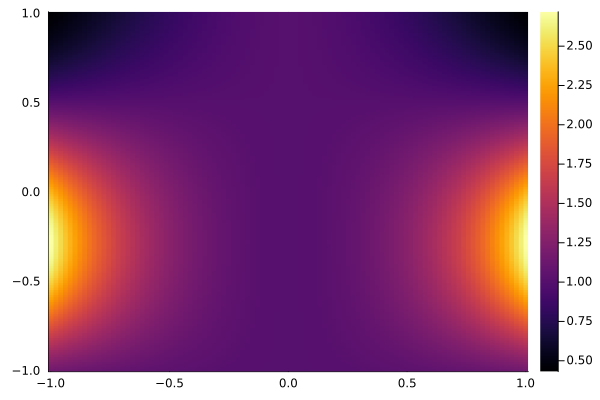

In [125]:
f = (x,y) -> exp(-x^2*sin(2y-1))

m,n = 150,100
x = range(-1, 1; length=n)
y = range(-1, 1; length=m)

F = f.(x', y) # equivalent to [f(x[j],y[k]) for k=1:m, j=1:n]

heatmap(x, y, F)

SVD

In [130]:
A = randn(10,10)

svdvals(A) #Return singular values

#SVD Compression at rank k
k = 5
u,s,v = svd(A)
u[:,1:k] * Diagonal(s)[1:k,1:k] * v[:,1:k]'


10×10 Matrix{Float64}:
 -0.0712056   0.797756    0.115966  …  -0.530861   0.46814     0.28357
 -0.582553    2.37937    -0.178594     -1.1806     0.234836   -0.711063
 -0.231056   -1.021      -0.133563     -2.09317   -1.16066    -1.86247
 -0.227443   -0.287712    1.43815      -1.43276   -0.0644843  -1.02809
  0.12598    -0.510057    0.385287     -0.159274  -0.583543   -0.829265
  0.472179   -0.234991    0.173996  …  -1.05017    0.365642    0.568659
  0.605774   -0.237416    3.16313      -0.79386   -0.769143   -2.19538
 -0.296136    0.21287     0.582238     -0.926448   0.366302   -0.116452
 -0.622077    1.75389    -0.492989     -0.589347  -0.027709   -0.70996
  0.618579    0.0481338   1.17013       0.225409   0.601271    0.72897

In [132]:
cond(A, 2) #Condition Number of A at p-norm

1648.1395849749797